In [ ]:
!pip install pycaret
!pip install jinja2
!pip install markupsafe==2.0.1
!pip install shap

In [ ]:
# Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
from pandas.core.arrays.categorical import contains
from pycaret.utils import version
from pycaret.classification import *
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import jinja2
import re
%matplotlib inline
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


Saving train.csv to train (7).csv


In [ ]:
# Importing Data to Google Colab
from google.colab import files
uploaded = files.upload()
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
#sub = pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))

# Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
profile = ProfileReport(train, title="Space Titanic Dataset", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

## Feature Engineering

### Spliting out the PassengerId into PassengerId and MemberId

In [ ]:
train[['PassengerId','MemberId']] = train['PassengerId'].str.split('_', n=2, expand = True)

In [ ]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0        0001     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1        0002      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2        0003     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3        0003     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4        0004      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported MemberId  
0        False       01  
1         True       01  
2        False       01  
3        False       02  
4         True       01

### HomePlanet NA fill in

In [ ]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [ ]:
train.HomePlanet.isna().sum()

201

In [ ]:
train['HomePlanet'].fillna("Other", inplace = True)

In [ ]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 'Other'], dtype=object)

### CryoSleep NA fill in

In [ ]:
train.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [ ]:
train.CryoSleep.isna().sum()

217

In [ ]:
train['CryoSleep'].fillna("Other", inplace = True)

In [ ]:
train.CryoSleep.unique()

array([False, True, 'Other'], dtype=object)

### Cabin Features take first letter of the cabin and create new column

In [ ]:
train['Cabinarea'] = train['Cabin'].astype(str).str[0]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  MemberId      8693 non-null   object 
 15  Cabinarea     8693 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


### Add new feature Total Spent

In [ ]:
train['Totalspent'] = train['RoomService'] + train['FoodCourt'] + train['Spa'] + train['VRDeck']

In [ ]:
train.Totalspent.isna().sum()

906

In [ ]:
train['Totalspent'].fillna(0, inplace = True)

turn it into categorical variables

In [ ]:
train.loc[train['Totalspent'] <= 0, 'Totalspent'] = 0
train.loc[(train['Totalspent'] > 1) & (train['Totalspent'] <= 1000), 'Totalspent'] = 1
train.loc[(train['Totalspent'] > 1000) & (train['Totalspent'] <= 2000), 'Totalspent'] = 2
train.loc[(train['Totalspent'] > 2000) & (train['Totalspent'] <= 6000), 'Totalspent'] = 3
train.loc[(train['Totalspent'] > 6000) & (train['Totalspent'] <= 8000), 'Totalspent'] = 4
train.loc[train['Totalspent'] > 8000, 'Totalspent'] = 5;

In [ ]:
train['RoomService'].fillna(0, inplace = True)

In [ ]:
train.loc[train['RoomService'] <= 0, 'VIP'] = 0
train.loc[(train['RoomService'] > 1) & (train['RoomService'] <= 1000), 'RoomService'] = 1
train.loc[(train['RoomService'] > 1000) & (train['RoomService'] <= 2000), 'RoomService'] = 2
train.loc[(train['RoomService'] > 2000) & (train['RoomService'] <= 6000), 'RoomService'] = 3
train.loc[(train['RoomService'] > 6000) & (train['RoomService'] <= 8000), 'RoomService'] = 4
train.loc[train['RoomService'] > 8000, 'RoomService'] = 5;

### Age to split in categorical factor

In [ ]:
train['Age'].fillna(train['Age'].mean())

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8688    41.0
8689    18.0
8690    26.0
8691    32.0
8692    44.0
Name: Age, Length: 8693, dtype: float64

In [ ]:
train.loc[train['Age'] <= 10, 'Age'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] <= 18), 'Age'] = 1
train.loc[(train['Age'] > 18) & (train['Age'] <= 32), 'Age'] = 2
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 3
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 4
train.loc[train['Age'] > 64, 'Age'];


### VIP changes 1 and 0

In [ ]:
train.VIP.unique()

array([False, True, nan], dtype=object)

In [ ]:
train['VIP'].fillna(False, inplace = True)

In [ ]:
train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
MemberId          0
Cabinarea         0
Totalspent        0
dtype: int64

### if they have a Cabin or not

In [ ]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [ ]:
train

PassengerId HomePlanet CryoSleep     Cabin    Destination  Age    VIP  \
0           0001     Europa     False     B/0/P    TRAPPIST-1e  3.0      0   
1           0002      Earth     False     F/0/S    TRAPPIST-1e  2.0  False   
2           0003     Europa     False     A/0/S    TRAPPIST-1e  4.0   True   
3           0003     Europa     False     A/0/S    TRAPPIST-1e  3.0      0   
4           0004      Earth     False     F/1/S    TRAPPIST-1e  1.0  False   
...          ...        ...       ...       ...            ...  ...    ...   
8688        9276     Europa     False    A/98/P    55 Cancri e  3.0      0   
8689        9278      Earth      True  G/1499/S  PSO J318.5-22  1.0      0   
8690        9279      Earth     False  G/1500/S    TRAPPIST-1e  2.0      0   
8691        9280     Europa     False   E/608/S    55 Cancri e  2.0      0   
8692        9280     Europa     False   E/608/S    TRAPPIST-1e  3.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1             1.0        9.0          25.0   549.0    44.0       Juanna Vines   
2             1.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4             1.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692          1.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported MemberId Cabinarea  Totalspent  Has_Cabin  
0           False       01         B         0.0          1  
1            True       01         F         1.0          1  
2           False       01         A         5.0          1  
3           False       02         A         3.0          1  
4            True       01         F         1.0          1  
...           ...      ...       ...         ...        ...  
8688        False       01         A         5.0          1  
8689        False       01         G         0.0          1  
8690         True       01         G         1.0          1  
8691        False       01         E         3.0          1  
8692         True       02         E         3.0          1  

[8693 rows x 18 columns]

In [ ]:
clean_train = train.drop(['Name','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin','PassengerId'], axis = 1)

In [ ]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8693 non-null   object 
 5   RoomService  8693 non-null   float64
 6   Transported  8693 non-null   bool   
 7   MemberId     8693 non-null   object 
 8   Cabinarea    8693 non-null   object 
 9   Totalspent   8693 non-null   float64
 10  Has_Cabin    8693 non-null   int64  
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 687.8+ KB


# Testing PyCaret Models

In [ ]:
experiment = setup(data = clean_train, 
             target = 'Transported',
             numeric_imputation = 'mean',
             categorical_features = ['CryoSleep','Destination','Age','VIP','MemberId','Has_Cabin','Totalspent','Cabinarea','HomePlanet','RoomService'], 
             silent = True,
            remove_outliers = True,
            normalize = True, transformation = True, feature_interaction= True, train_size = .8, log_experiment = True, feature_selection = True)

Description              Value
0                               session_id                681
1                                   Target        Transported
2                              Target Type             Binary
3                            Label Encoded  False: 0, True: 1
4                            Original Data         (8693, 11)
5                           Missing Values               True
6                         Numeric Features                  0
7                     Categorical Features                 10
8                         Ordinal Features              False
9                High Cardinality Features              False
10                 High Cardinality Method               None
11                   Transformed Train Set         (6608, 66)
12                    Transformed Test Set         (1739, 66)
13                      Shuffle Train-Test               True
14                     Stratify Train-Test              False
15                          Fold Generator    StratifiedKFold
16                             Fold Number                 10
17                                CPU Jobs                 -1
18                                 Use GPU              False
19                          Log Experiment               True
20                         Experiment Name   clf-default-name
21                                     USI               6d90
22                         Imputation Type             simple
23          Iterative Imputation Iteration               None
24                         Numeric Imputer               mean
25      Iterative Imputation Numeric Model               None
26                     Categorical Imputer           constant
27  Iterative Imputation Categorical Model               None
28           Unknown Categoricals Handling     least_frequent
29                               Normalize               True
30                        Normalize Method             zscore
31                          Transformation               True
32                   Transformation Method        yeo-johnson
33                                     PCA              False
34                              PCA Method               None
35                          PCA Components               None
36                     Ignore Low Variance              False
37                     Combine Rare Levels              False
38                    Rare Level Threshold               None
39                         Numeric Binning              False
40                         Remove Outliers               True
41                      Outliers Threshold               0.05
42                Remove Multicollinearity              False
43             Multicollinearity Threshold               None
44             Remove Perfect Collinearity               True
45                              Clustering              False
46                    Clustering Iteration               None
47                     Polynomial Features              False
48                       Polynomial Degree               None
49                    Trignometry Features              False
50                    Polynomial Threshold               None
51                          Group Features              False
52                       Feature Selection               True
53                Feature Selection Method            classic
54            Features Selection Threshold                0.8
55                     Feature Interaction               True
56                           Feature Ratio              False
57                   Interaction Threshold               0.01
58                           Fix Imbalance              False
59                    Fix Imbalance Method              SMOTE

2022/06/03 16:21:49 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7356  0.8067  0.6645  0.7805   
ridge                    Ridge Classifier    0.7328  0.0000  0.6669  0.7740   
lda          Linear Discriminant Analysis    0.7328  0.8005  0.6666  0.7742   
lr                    Logistic Regression    0.7321  0.8012  0.6654  0.7737   
ada                  Ada Boost Classifier    0.7315  0.8007  0.6755  0.7668   
lightgbm  Light Gradient Boosting Machine    0.7311  0.7982  0.6717  0.7678   
nb                            Naive Bayes    0.7261  0.7851  0.6325  0.7846   
svm                   SVM - Linear Kernel    0.7217  0.0000  0.6837  0.7501   
rf               Random Forest Classifier    0.7140  0.7811  0.6791  0.7356   
et                 Extra Trees Classifier    0.7099  0.7670  0.6630  0.7373   
dt               Decision Tree Classifier    0.7025  0.7448  0.6624  0.7255   
knn                K Neighbors Classifier    0.6957  0.7576  0.6504  0.7213   
qda       Quadratic Discriminant Analysis    0.6691  0.6698  0.6041  0.7152   
dummy                    Dummy Classifier    0.5061  0.5000  1.0000  0.5061   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.7175  0.4721  0.4778     0.796  
ridge     0.7161  0.4663  0.4713     0.033  
lda       0.7160  0.4663  0.4713     0.109  
lr        0.7151  0.4651  0.4701     0.225  
ada       0.7177  0.4638  0.4677     0.318  
lightgbm  0.7161  0.4629  0.4670     0.150  
nb        0.7001  0.4534  0.4625     0.035  
svm       0.7122  0.4439  0.4493     0.116  
rf        0.7059  0.4285  0.4301     0.888  
et        0.6979  0.4205  0.4229     0.926  
dt        0.6923  0.4055  0.4073     0.050  
knn       0.6834  0.3920  0.3945     0.535  
qda       0.6521  0.3389  0.3460     0.069  
dummy     0.6720  0.0000  0.0000     0.026

In [ ]:
model2 = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7504  0.8286  0.7432  0.7546  0.7489  0.5008  0.5008
1       0.7413  0.8062  0.6918  0.7685  0.7281  0.4827  0.4851
2       0.7231  0.8005  0.7069  0.7312  0.7189  0.4463  0.4466
3       0.7443  0.8238  0.7553  0.7396  0.7474  0.4886  0.4887
4       0.7610  0.8392  0.7492  0.7678  0.7584  0.5220  0.5221
5       0.7640  0.8421  0.7402  0.7778  0.7585  0.5280  0.5286
6       0.7409  0.8247  0.6970  0.7641  0.7290  0.4818  0.4837
7       0.7455  0.8126  0.7281  0.7555  0.7415  0.4910  0.4913
8       0.7667  0.8550  0.7130  0.8000  0.7540  0.5335  0.5367
9       0.7470  0.8208  0.7160  0.7645  0.7395  0.4940  0.4950
Mean    0.7484  0.8253  0.7241  0.7624  0.7424  0.4969  0.4979
Std     0.0123  0.0159  0.0212  0.0182  0.0129  0.0246  0.0249

In [ ]:
tuned_model1 = tune_model(model2)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7504  0.8200  0.7190  0.7677  0.7426  0.5008  0.5018
1       0.7413  0.8003  0.6767  0.7778  0.7237  0.4827  0.4868
2       0.7141  0.7963  0.7039  0.7191  0.7115  0.4282  0.4283
3       0.7489  0.8172  0.7553  0.7463  0.7508  0.4977  0.4978
4       0.7625  0.8442  0.7613  0.7636  0.7625  0.5250  0.5250
5       0.7610  0.8351  0.7281  0.7799  0.7531  0.5220  0.5231
6       0.7439  0.8263  0.6909  0.7729  0.7296  0.4879  0.4906
7       0.7470  0.8070  0.7190  0.7628  0.7403  0.4940  0.4948
8       0.7742  0.8563  0.7160  0.8116  0.7608  0.5486  0.5525
9       0.7455  0.8338  0.7009  0.7708  0.7342  0.4910  0.4931
Mean    0.7489  0.8237  0.7171  0.7673  0.7409  0.4978  0.4994
Std     0.0151  0.0183  0.0251  0.0225  0.0156  0.0303  0.0307

In [ ]:
#evaluate model
evaluate_model(tuned_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

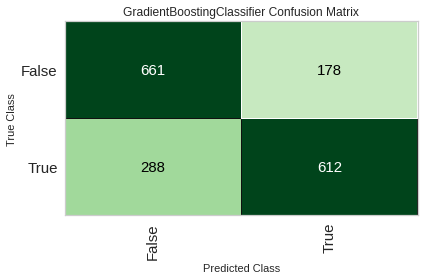

In [ ]:
plot_model(estimator = tuned_model1, plot = 'confusion_matrix')

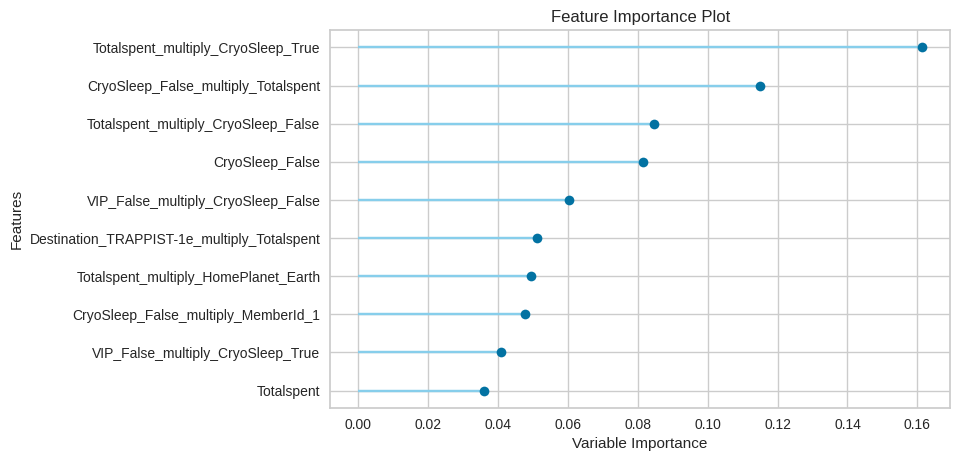

In [ ]:
plot_model(estimator = tuned_model1, plot = 'feature')